# Spectra

Here code examples for spectra visualization and analysis is given.

## XRD spectra

This part discusses how the code deal with the output by the 'XRDSPEC' keyword of 'properties' calculation.

### The 'read_XRDspec' method

The `read_XRDspec()` method is defined in `crystal_io.Properties_output` classes, which requires the standard screen output by CRYSTAL.

With `option='LP'`, the XRD spectra with Lorentz and polarization effects is read.

In [1]:
from CRYSTALpytools.crystal_io import Properties_output

pout = Properties_output('spec_diamondXRD.out').read_XRDspec(option='LP')
print('Type : {}'.format(type(pout)))
print('N 2theta : {:d}'.format(pout.theta.shape[0]))

Type : <class 'CRYSTALpytools.spectra.XRD'>
N 2theta : 2000


### The 'XRD' class

The `spectra.XRD` class is defined for XRD spectra, which enables quick instantiation and visualization.

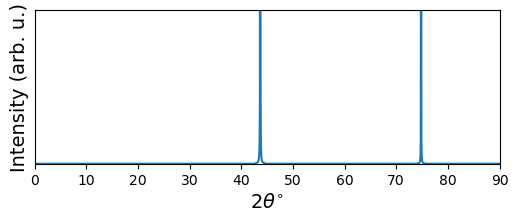

In [2]:
from CRYSTALpytools.spectra import XRD

fig = XRD.from_file('spec_diamondXRD.out').plot(theta_range=[0, 90], figsize=[6, 2])

### The 'plot_XRD' function

The `plot.plot_XRD()` function, similar to other cases, enables comparison among different systems or spectra. The plot setups are similar to `plot_electron_doss` or `plot_transport_tensor`.

As an example, the XRD spectra obtained with different methods are compared. Use `shift` to control the distance between spectra. The maximum intensity of all spectra is normalized to 100, which is not changable.

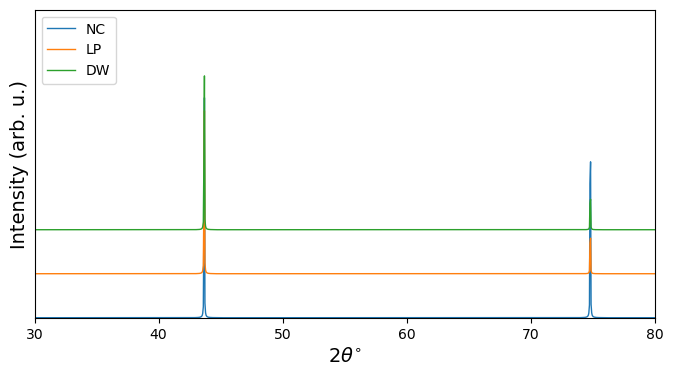

In [3]:
from CRYSTALpytools.plot import plot_XRD
from CRYSTALpytools.spectra import XRD

obj1 = XRD.from_file('spec_diamondXRD.out', option='NC')
obj2 = XRD.from_file('spec_diamondXRD.out', option='LP')
obj3 = XRD.from_file('spec_diamondXRD.out', option='DW')

fig = plot_XRD(obj1, obj2, obj3, label=['NC', 'LP', 'DW'], shift=20,
               figsize=[8, 4], theta_range=[30, 80], legend='upper left')

## IR spectra

This part discusses how the code deal with the infrared spectra from harmonic phonon calculations.

**NOTE**

Currently, methods are developed for IR absorbance and reflectance spectra only (i.e., IRSPEC.DAT). Not available for refractive index (IRREFR.DAT) or dielectric function (IRDIEL.DAT). Though, in principle, the samiliar file format is followed and can be visualized if the user tunes parameters carefully.

### The 'get_spectra' method

The `get_spectra()` method is defined in `crystal_io.Crystal_output` classes, which requires the 'IRSPEC.DAT' data by CRYSTAL.

Get a `spectra.IR` object with `type='IRSPEC'` or `type='infer'` (default, filename must contain 'IRSPEC'). Though currently the screen output is not required, having one during instantiation will let the code to check if the spectrum file matches the output file.

Frequency unit used for the object is cm$^{-1}$.

In [1]:
from CRYSTALpytools.crystal_io import Crystal_output

ir = Crystal_output('spec_dryIceIR.out').get_spectra('spec_dryIceIR.IRSPEC')

print('Frequency Unit: {}'.format(ir.unit))
print('Length of frequency: {:d}'.format(len(ir.frequency)))
print('Number of inequivalent directions of reflectance spectra: {:d}'.format(
    len(ir.reflectance)
))

Frequency Unit: cm-1
Length of frequency: 2794
Number of inequivalent directions of reflectance spectra: 3


### The 'IR' class

The `spectra.IR` class is defined for IR spectra, which enables quick instantiation and visualization.

Plot the IR absorbance spectrum with the default Lorentzian-Gaussian broadening.

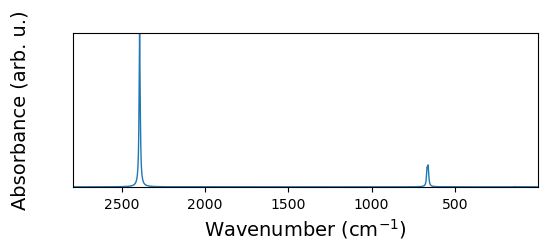

In [4]:
from CRYSTALpytools.spectra import IR

obj = IR.from_file('spec_dryIceIR.IRSPEC', output='spec_dryIceIR.out')
fig = obj.plot(unit='cm-1', option='LG', figsize=[6, 2])

Plot the IR reflectance spectra along all the inequivalent directions. Plot wavelength with `unit='nm'`.

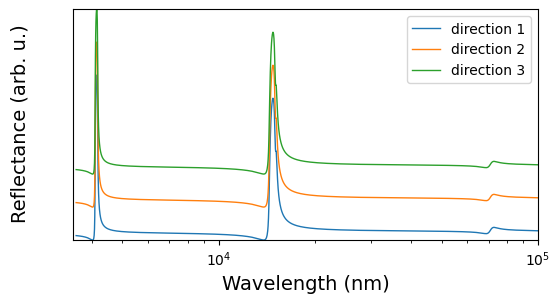

In [10]:
from CRYSTALpytools.spectra import IR

obj = IR.from_file('spec_dryIceIR.IRSPEC', output='spec_dryIceIR.out')
fig = obj.plot(unit='nm', option='REFL', figsize=[6, 3], shift=20,
               x_range=[3.5e3, 1e5], label='direction', legend='upper right')

### The 'plot_IR' function
The `plot.plot_IR()` function, similar to other cases, enables comparison among different systems and spectra. The plot setups are similar to `plot_electron_doss` or `plot_transport_tensor`.

IR spectra by Voigt broadening of dry ice under -1%, 0% and 1% strains are plotted. The maximum intensity of all spectra is normalized to 100, which is not changable.

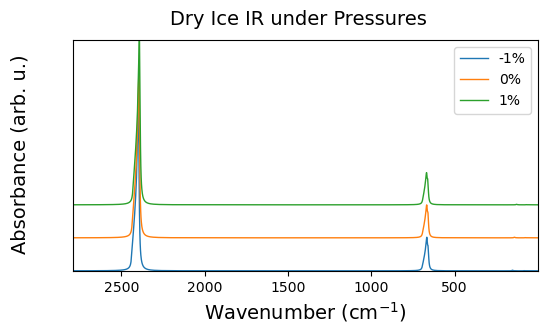

In [12]:
from CRYSTALpytools.plot import plot_IR

fig = plot_IR('spec_dryIceS-1IR.IRSPEC', 'spec_dryIceIR.IRSPEC', 'spec_dryIceS1IR.IRSPEC',
              option='V', shift=20, legend='upper right', label=['-1%', '0%', '1%'],
              title='Dry Ice IR under Pressures', figsize=[6,3])

Multi-panel plotting is enabled for reflectance spectra. NDirection\*1 subplots are generated. 

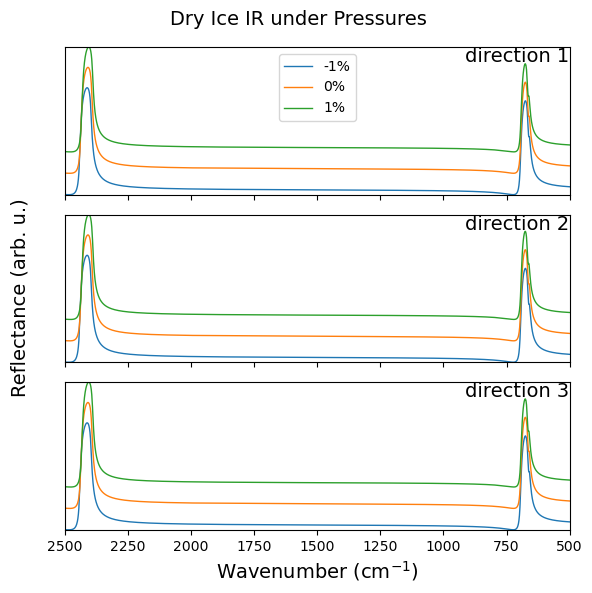

In [15]:
from CRYSTALpytools.plot import plot_IR

fig = plot_IR('spec_dryIceS-1IR.IRSPEC', 'spec_dryIceIR.IRSPEC', 'spec_dryIceS1IR.IRSPEC',
              option='REFL', shift=20, legend='upper center', label=['-1%', '0%', '1%'],
              title='Dry Ice IR under Pressures', figsize=[6,6], x_range=[500, 2500])

## Raman spectra

This part discusses how the code deal with the Raman spectra from harmonic phonon calculations, which is similar to IR spectra.

### The 'get_spectra' method
The same method is used for IR and Raman spectra.

In [16]:
from CRYSTALpytools.crystal_io import Crystal_output

ra = Crystal_output('spec_dryIceRaman.out').get_spectra('spec_dryIceRaman.RAMSPEC')

print('Frequency Unit: {}'.format(ra.unit))
print('Length of frequency: {:d}'.format(len(ra.frequency)))

Frequency Unit: cm-1
Length of frequency: 3112


## The 'Raman' class
The `spectra.Raman` class is defined for Raman spectra, which enables quick instantiation and visualization.

Plot the polycrystalline Raman spectra.

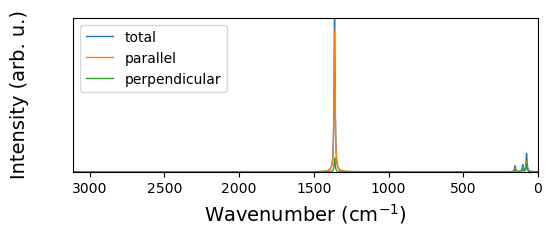

In [2]:
from CRYSTALpytools.spectra import Raman

obj = Raman.from_file('spec_dryIceRaman.RAMSPEC', output='spec_dryIceRaman.out')
fig = obj.plot(option='poly', figsize=[6,2])

For single crystal Raman spectra, the user can specify the directions to plot.

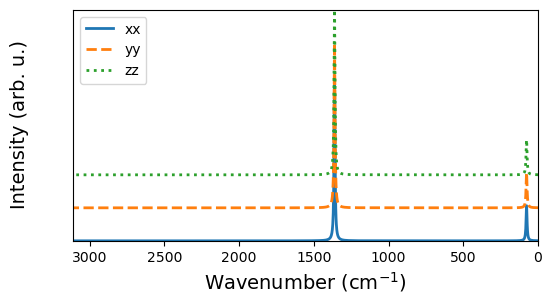

In [1]:
from CRYSTALpytools.spectra import Raman

obj = Raman.from_file('spec_dryIceRaman.RAMSPEC', output='spec_dryIceRaman.out')
fig = obj.plot(option='single', figsize=[6,3], direction=['xx', 'yy', 'zz'],
               linestyle=['-', '--', ':'], linewidth=2, shift=20)

### The 'plot_Raman' function

The `plot.plot_Raman()` function, similar to other cases, enables comparison among different systems and spectra. The plot setups are similar to `plot_electron_doss` or `plot_transport_tensor`.

Total polycrystalline Raman spectra of dry ice under -1%, 0% and 1% strains are plotted. The maximum intensity of all spectra is normalized to 100, which is not changable.

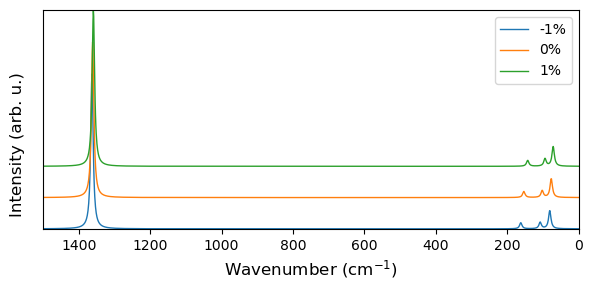

In [3]:
from CRYSTALpytools.plot import plot_Raman

fig = plot_Raman('spec_dryIceS-1Raman.RAMSPEC', 'spec_dryIceRaman.RAMSPEC',
                 'spec_dryIceS1Raman.RAMSPEC', option='tot', shift=20,
                 label=['-1%', '0%', '1%'], x_range=[0, 1500], fontsize=12,
                 figsize=[6, 3], legend='upper right')

Single crystal Raman spectra of the same systems along xx, yy and zz directions.

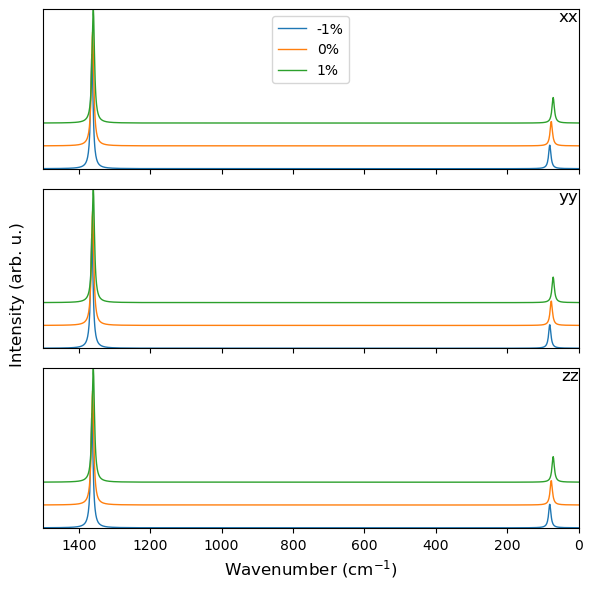

In [9]:
from CRYSTALpytools.plot import plot_Raman

fig = plot_Raman('spec_dryIceS-1Raman.RAMSPEC', 'spec_dryIceRaman.RAMSPEC',
                 'spec_dryIceS1Raman.RAMSPEC', option='single', shift=20,
                 label=['-1%', '0%', '1%'], x_range=[0, 1500], fontsize=12,
                 figsize=[6, 6], direction=['xx', 'yy', 'zz'],
                 legend='upper center', sharey=True)

For more information, please refer to the module-specific documentations.